# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

## 1. Cargar el DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('./Datos+Meteorológicos_Arg_2023.csv')
df.head(10)

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
5,2/1/2023,Buenos Aires,31,15,0.0,10.6,67.1
6,2/1/2023,Cordoba,32,20,0.0,20.8,56.2
7,2/1/2023,Rosario,23,17,0.0,16.3,37.7
8,2/1/2023,Mendoza,34,19,0.0,39.7,36.1
9,2/1/2023,Tucuman,28,19,0.0,24.0,44.7


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [34]:
df.isnull().sum()

Fecha                   0
Ciudad                  0
Temperatura Maxima      0
Temperatura Minima      0
Precipitacion           0
Velocidad del Viento    0
Humedad Relativa        0
dtype: int64

## 2. Fechas en el formato correcto

In [35]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d/%m/%Y")
print(type(df["Fecha"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## 3. Desarrollo del Programa

In [78]:
df.head(5)

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9


In [79]:
ciudades_elegibles = df["Ciudad"]

def pedir_datos():
    while True:
        ciudad = input("Ingrese nombre de la ciudad: ")
        mes = int(input("Ingrese el mes (1-12): "))
        if mes < 1 or mes > 12:
            print("El mes no es válido. Intente nuevamente.")
            continue
        if ciudad not in ciudades_elegibles.values:
            print("La ciudad no es válida. Intente nuevamente.")
            continue
        
        return ciudad, mes
        

In [3]:
def generar_grafico(df_filtrado, ciudad, mes):

    plt.plot(df_filtrado["Fecha"], 
            df_filtrado["Temperatura Minima"], 
            color="blue")
    
    plt.plot(df_filtrado["Fecha"], 
            df_filtrado["Temperatura Maxima"],
            color="red")

    plt.title(f"Temperaturas en {ciudad} - Mes de {mes}")

    plt.xlabel("Fecha")
    plt.ylabel("Temperatura (°C)")
    plt.xticks(rotation=45)
    plt.legend(["Temperatura Minima", "Temperatura Maxima"])
    plt.tight_layout()
    plt.show()


In [101]:
def mapear_mes_con_nombres(mes):
    meses = {
        1: "Enero",
        2: "Febrero",
        3: "Marzo",
        4: "Abril",
        5: "Mayo",
        6: "Junio",
        7: "Julio",
        8: "Agosto",
        9: "Septiembre",
        10: "Octubre",
        11: "Noviembre",
        12: "Diciembre"
    }
    return meses[mes]


def graficar_datos(df, ciudad, mes):
    filtro = (df["Fecha"].dt.month == mes) & (df["Ciudad"] == ciudad)
    df_filtrado = df[filtro]
    generar_grafico(df_filtrado, ciudad, mapear_mes_con_nombres(mes))
    pass

In [90]:
def programa():

    while True:
        ciudad, mes = pedir_datos()
        graficar_datos(df, ciudad, mes)
        continuar = input("¿Desea continuar? (s/n): ")
        if continuar.lower() != "s":
            break
    print("Gracias por usar el programa.")

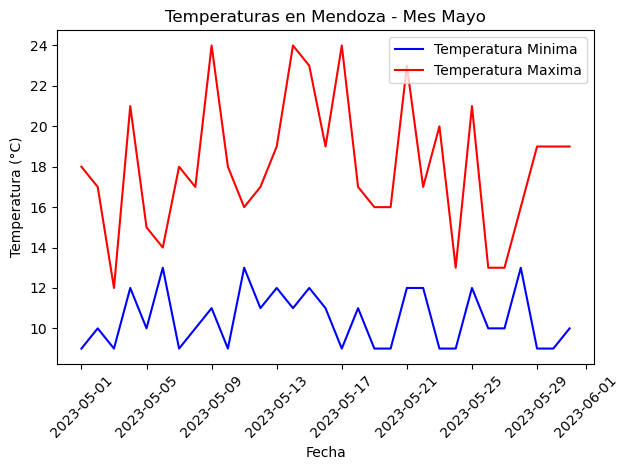

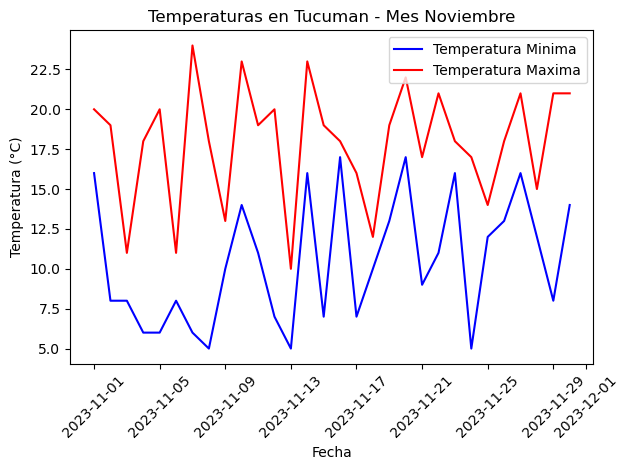

Gracias por usar el programa.


In [99]:
programa()